# Data Science Virtual Internship Program at LetsGrowMore

# Task : Neural Network To Read Handwriting

# Name: Samiksha Sunil Nand

# 

Import Required Library

In [5]:
import tensorflow as tf

In [6]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop

Load the MNIST dataset. We make a split of train and test set.

In [7]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [8]:
train = mnist_train_images.reshape(60000, 784)
test = mnist_test_images.reshape(10000, 784)

We also convert the input to the format which keras accepts.

In [9]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

In [10]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

Visualizing The Dataset.

In [25]:
import matplotlib.pyplot as plt

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


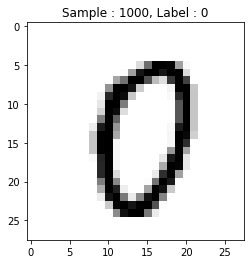

In [13]:
def display(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    image = train[num].reshape([28,28])
    plt.title('Sample : %d, Label : %d' % (num,label))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display(1000)

Building Sequential Model In Neural Network

In [14]:
model = Sequential()
model.add(Dense(512, activation='relu' , input_shape = (784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation = 'softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


Model optimization

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

Fitting the training data to the model

In [18]:
history = model.fit(train, train_labels, batch_size = 100, epochs = 10, verbose = 2, validation_data=())

Epoch 1/10
600/600 - 9s - loss: 0.2364 - accuracy: 0.9280
Epoch 2/10
600/600 - 9s - loss: 0.1028 - accuracy: 0.9694
Epoch 3/10
600/600 - 8s - loss: 0.0759 - accuracy: 0.9772
Epoch 4/10
600/600 - 9s - loss: 0.0640 - accuracy: 0.9813
Epoch 5/10
600/600 - 9s - loss: 0.0530 - accuracy: 0.9845
Epoch 6/10
600/600 - 8s - loss: 0.0470 - accuracy: 0.9864
Epoch 7/10
600/600 - 8s - loss: 0.0400 - accuracy: 0.9887
Epoch 8/10
600/600 - 8s - loss: 0.0378 - accuracy: 0.9893
Epoch 9/10
600/600 - 8s - loss: 0.0340 - accuracy: 0.9904
Epoch 10/10
600/600 - 8s - loss: 0.0321 - accuracy: 0.9910


Model Evaluation

In [19]:
score = model.evaluate(test,test_labels,verbose=0)
print("Test loss", score[0])
print("Test accuracy", score[1])

Test loss 0.0879356786608696
Test accuracy 0.9830999970436096


Finding Which Numbers Have Been Wrongly Predicted. 

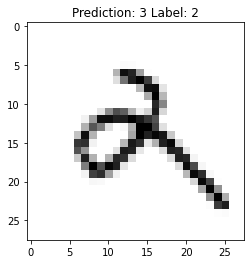

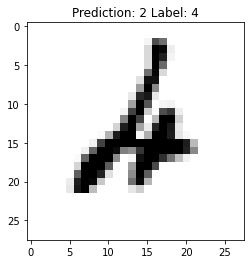

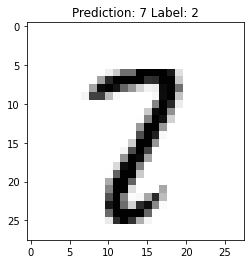

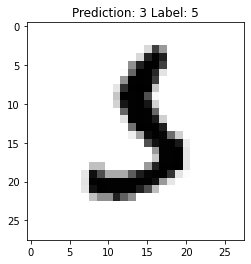

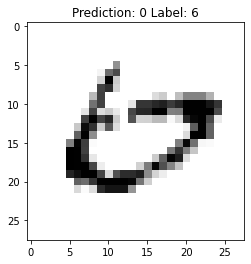

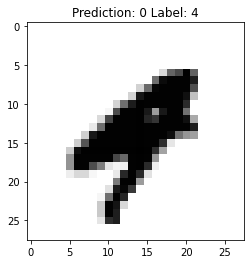

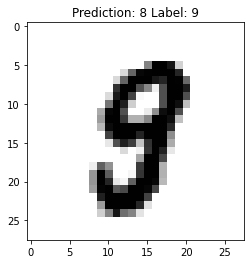

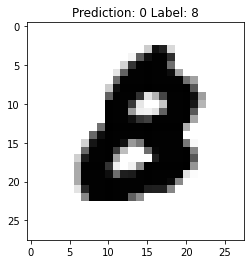

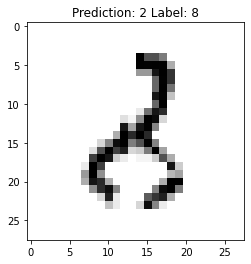

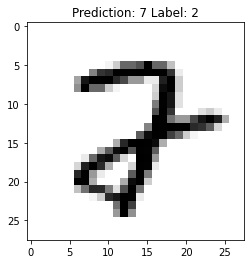

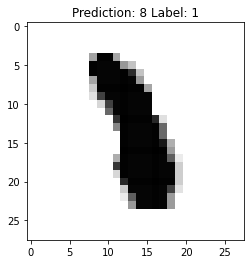

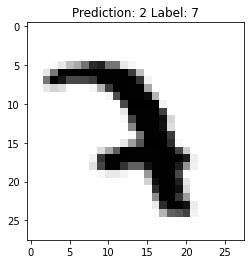

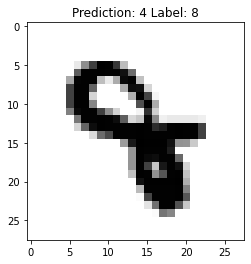

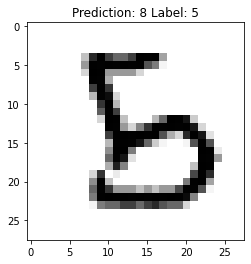

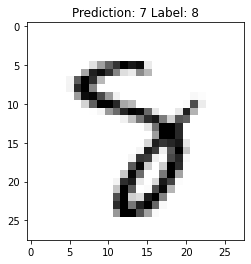

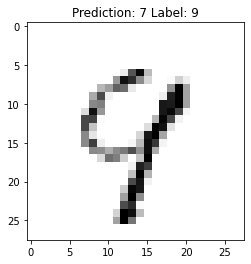

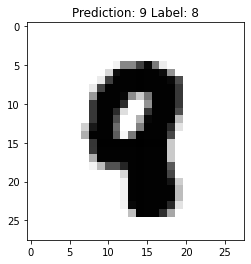

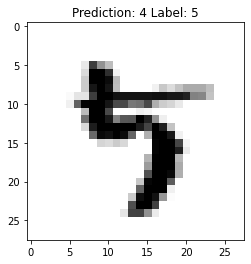

In [23]:
for x in range(1000):
    test_image = test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if(predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()